In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/611noorsaeed/Resume-Screening-App/refs/heads/main/UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='Category'>

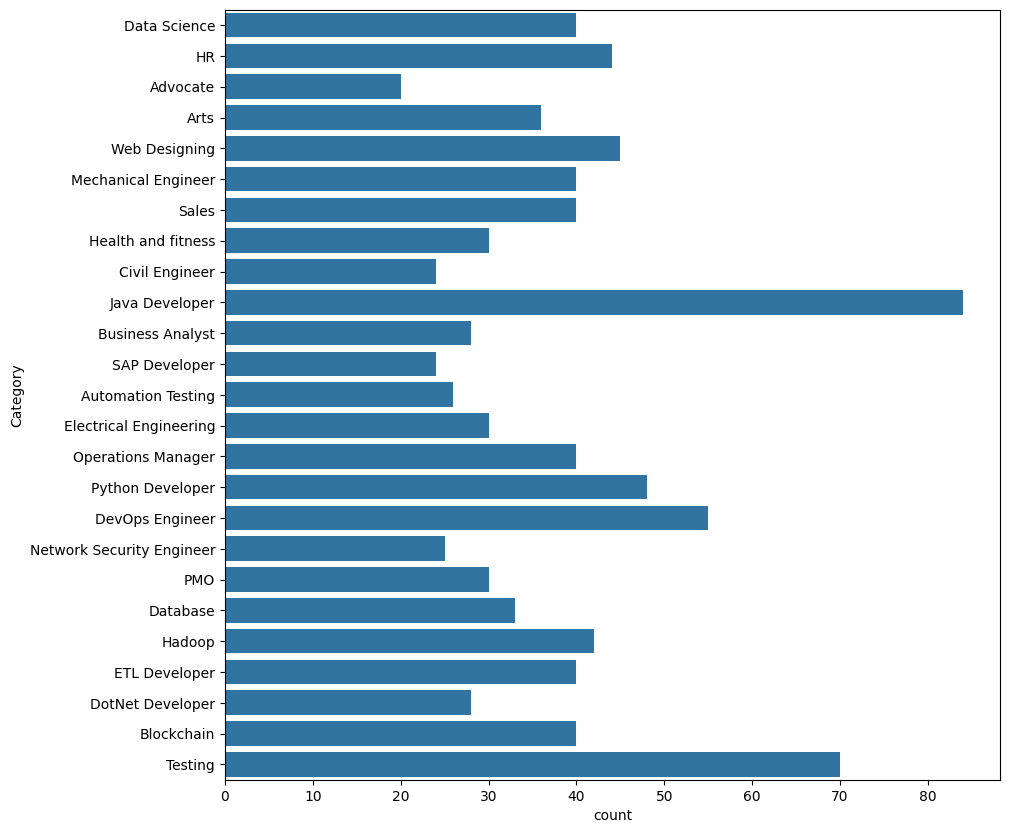

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['Category'])

In [ ]:
import re
def cleanResume(txt):
  cleanText = re.sub('http\S+\s', ' ', txt)
  cleanText = re.sub('RT|cc', ' ', cleanText)
  cleanText = re.sub('#\S+\s', ' ', cleanText)
  cleanText = re.sub('@\S+', '  ', cleanText)
  cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
  cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
  cleanText = re.sub('\s+', ' ', cleanText)
  return cleanText

In [ ]:
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df["Resume"]

,Resume
0,Skills Programming Languages Python pandas num...
1,Education Details May 2013 to May 2017 B E UIT...
2,Areas of Interest Deep Learning Control System...
3,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Education Details MCA YMCAUST Faridabad Haryan...
...,...
957,Computer Skills Proficient in MS office Word B...
958,Willingness to a ept the challenges Positive ...
959,PERSONAL SKILLS Quick learner Eagerness to lea...
960,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df["Category"] = le.fit_transform(df["Category"])

In [ ]:
df["Category"]

,Category
0,6
1,6
2,6
3,6
4,6
...,...
957,23
958,23
959,23
960,23


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [ ]:
x_cv = cv.fit_transform(df["Resume"]).toarray()

In [ ]:
x_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

In [ ]:
x_tf = tf.fit_transform(df["Resume"]).toarray()

In [ ]:
x_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split

## using CountVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_cv, df["Category"], test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 7566), (241, 7566), (721,), (241,))

In [ ]:
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 309     5
 29      6
 55     12
 482    11
 332    15
        ..
 106     1
 270    14
 860     3
 435    21
 102     0
 Name: Category, Length: 721, dtype: int64)

In [ ]:
X_test, y_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 344    15
 381    15
 351    15
 778    13
 277    14
        ..
 839     9
 889     3
 118     1
 331    15
 746    13
 Name: Category, Length: 241, dtype: int64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

ref.: https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

In [ ]:
knn_model_cv = OneVsRestClassifier(KNeighborsClassifier())

In [ ]:
knn_model_cv.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
knn_model_cv.predict(X_test)

array([15, 15, 15, 13, 14, 17, 16,  2, 12, 14, 13, 12, 16, 23, 20,  5, 13,
        4, 10,  3, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23, 12, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19, 19, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8, 12,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
       12, 11, 15, 12,  3, 12,  3,  7, 12, 19,  8, 20, 19,  3, 15, 12, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11, 12, 15, 19, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12, 16, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23, 15,  3, 18, 14,  1, 12, 13, 22, 12, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  6,
       20, 16,  7,  8, 23

In [ ]:
y_test.values

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23,  6, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20,  8,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20,  6,  6,  7, 23,  2,  3, 18, 14,  1, 12, 13, 22, 12, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  0,
       20, 16,  7,  8, 23

In [ ]:
import numpy as np

In [ ]:
np.mean(knn_model_cv.predict(X_test) == y_test)

0.921161825726141

## using TfidfVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_tf, df["Category"], test_size=0.25, random_state=42)

In [ ]:
knn_model_tf = OneVsRestClassifier(KNeighborsClassifier())

In [ ]:
knn_model_tf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
knn_model_tf.predict(X_test)

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23,  2,  3, 18, 14,  1, 12, 13, 22, 12, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  6,
       20, 16,  7,  8, 23

In [ ]:
np.mean(knn_model_tf.predict(X_test) == y_test)

0.979253112033195

## prediction

In [ ]:
test_resume = myresume = """I am an SAP developer specializing in SAP ERP
implementation, customization, and integration. With
a strong foundation in business processes, SAP ABAP,
and Fiori, I am passionate about delivering optimized
enterprise solutions. I have extensive experience in
developing, enhancing, and maintaining SAP modules,
including MM, SD, and FI. My technical expertise
includes proficiency in SAP ABAP, SAP HANA, and
SAP Fiori/UI5 development.
What sets me apart is my ability to bridge the gap
between business requirements and technical
implementation, ensuring smooth project delivery. I
thrive in collaborative environments, working with
cross-functional teams to deliver high-quality SAP
solutions that streamline operations and drive
business growth.
If you're looking for a dedicated and detail-oriented
SAP Developer to enhance your SAP ecosystem, I am
eager to contribute my skills. Let's work together to
optimize your enterprise operations and unlock new
efficiencies in your SAP environment.
Contact & Sources
Email: sapdeveloper.email@example.com
Phone: 123-456-7890
Github: https://github.com/sapdeveloper
LinkedIn: https://www.linkedin.com/in/sapdeveloper/
Blogs: https://medium.com/@sapdeveloper
Youtube: SAP Development Insights
ABOUT ME
WORK EXPERIENCE
SKILLS
[YOUR NAME]
LANGUAGES
English
German
I am a versatile SAP Developer with expertise across
various SAP modules, including MM, SD, FI, and PM.
Throughout my career, I have successfully contributed
to large-scale SAP implementations, customized
solutions, and integrated third-party systems to
enhance functionality and drive business success.
SAP ABAP Programming
SAP HANA Development
SAP Fiori/UI5 Design and Development
SAP Module Customization (MM, SD, FI)
Business Process Optimization
Integration with Third-Party Tools
Technical and Functional Documentation
Communication and Stakeholder Management
"""

In [ ]:
cleaned_test_resume = cleanResume(test_resume)

In [ ]:
cleaned_test_resume

'I am an SAP developer specializing in SAP ERP implementation customization and integration With a strong foundation in business processes SAP ABAP and Fiori I am passionate about delivering optimized enterprise solutions I have extensive experience in developing enhancing and maintaining SAP modules including MM SD and FI My technical expertise includes proficiency in SAP ABAP SAP HANA and SAP Fiori UI5 development What sets me apart is my ability to bridge the gap between business requirements and technical implementation ensuring smooth project delivery I thrive in collaborative environments working with cross functional teams to deliver high quality SAP solutions that streamline operations and drive business growth If you re looking for a dedicated and detail oriented SAP Developer to enhance your SAP ecosystem I am eager to contribute my skills Let s work together to optimize your enterprise operations and unlock new efficiencies in your SAP environment Contact Sources Email sapde

### predict using CountVectorizer

In [ ]:
input = cv.transform([cleaned_test_resume]).toarray()

In [ ]:
predicted_cv = knn_model_cv.predict(input)

In [ ]:
predicted_cv.item()

21

In [ ]:
le.inverse_transform([predicted_cv.item()])

array(['SAP Developer'], dtype=object)

In [ ]:
pd.Series(le.inverse_transform(df["Category"])).unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
pd.Series(le.fit_transform(df["Category"])).unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
input = tf.transform([cleaned_test_resume]).toarray()

In [ ]:
predicted_tf = knn_model_cv.predict(input)

In [ ]:
predicted_tf

array([12])

In [ ]:
test_res_2 = """ Creative and detail-oriented professional with a passion for artistic expression across various mediums,
including painting, sculpture, and digital design. Proven ability to conceptualize and execute artistic projects that communicate
ideas effectively and resonate with diverse audiences. Skilled in collaborating with teams and engaging in community art initiatives, enhancing cultural awareness
and appreciation through art. Strong background in art history, theory, and contemporary practices, contributing to a well-rounded understanding of the field."""

In [ ]:
cleaned_test_res_2 = cleanResume(test_res_2)

In [ ]:
input = cv.transform([cleaned_test_res_2]).toarray()

In [ ]:
predicted_cv = knn_model_cv.predict(input)

In [ ]:
predicted_cv.item()

12

### predict using TfidfVectorizer

In [ ]:
input = tf.transform([cleaned_test_res_2]).toarray()

In [ ]:
predicted_tf = knn_model_tf.predict(input)

In [ ]:
predicted_tf.item()

1

In [ ]:
import pickle

In [ ]:
pickle.dump(knn_model_cv, open("knn_model_cv.pkl", "wb"))
pickle.dump(knn_model_tf, open("knn_model_tf.pkl", "wb"))

In [ ]:
pickle.dump(cv, open("count_vectorizer.pkl", "wb"))
pickle.dump(tf, open("tfidf_vectorizer.pkl", "wb"))

pickle.dump(le, open("category_le.pkl", "wb"))